### Target: FNGU - Tech, [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf) - Weed stonks, or [XEG](https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf) - Candian OIL

Get the least spearman correlated features with the target and use ICA for *compress* the feature space, and add on the most spearman correlated features. This is an **alternative** to getting rid of potentially useful information.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# !pip install yfinance
import yfinance as yf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime
 
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

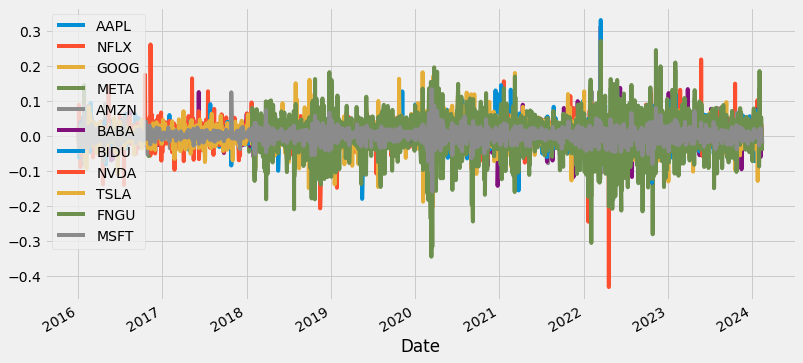

In [11]:
USE_LOG_RETURN = True

# ls = ['HMMJ,'ogi','hexo','cweb','smg','apha','gwprf','tlry','acb','cron','weed.TO'] # ,'weed'
# ls = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to', ,'PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'] # 'PXT.to' and after are less weighted in XEG - which is market cap weighted
ls = ['AAPL','NFLX','GOOG','META','AMZN','BABA','BIDU','NVDA','TSLA','FNGU', 'MSFT'] # ,'weed'


data = {} 

for i in ls:
  arry= yf.download(i, start, end)

  if USE_LOG_RETURN:
    data[i] =  pd.Series(np.diff(np.log(arry["Adj Close"])), index=arry.index[1:])
  else:
    data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)

# stocks=stocks.dropna()
stocks.plot(grid = True)

In [12]:
np.sum(stocks.isna())
stocks.shape
stocks.dropna(inplace=True)
stocks.shape
stocks.head(5)

AAPL      0
NFLX      0
GOOG      0
META      0
AMZN      0
BABA      0
BIDU      0
NVDA      0
TSLA      0
FNGU    517
MSFT      0
dtype: int64

(2041, 11)

(1524, 11)

,AAPL,NFLX,GOOG,META,AMZN,BABA,BIDU,NVDA,TSLA,FNGU,MSFT
Date,,,,,,,,,,,
2018-01-24,-0.016057,0.043049,-0.004910,-0.014898,-0.003698,0.016761,0.002367,-0.013103,-0.019752,-0.002056,-0.000871
2018-01-25,-0.018012,0.031641,0.005251,0.004973,0.014945,0.014219,-0.014919,0.002330,-0.024141,-0.000749,0.005539
2018-01-26,0.002335,0.018005,0.004663,0.013352,0.017339,0.034150,0.023757,0.029105,0.015313,0.079351,0.018564
2018-01-29,-0.020916,0.035734,-0.000221,-0.021385,0.011086,-0.010827,-0.025372,0.014362,0.019296,0.016980,-0.001490
2018-01-30,-0.005912,-0.020555,-0.010166,0.006111,0.014106,-0.016639,-0.038816,-0.016872,-0.010671,-0.028462,-0.012643


In [13]:
if not USE_LOG_RETURN:
    roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
    roi = round(roi*100)
    roi = pd.DataFrame(roi)
    roi.transpose()
    roi.plot.bar()

<AxesSubplot:xlabel='Date'>

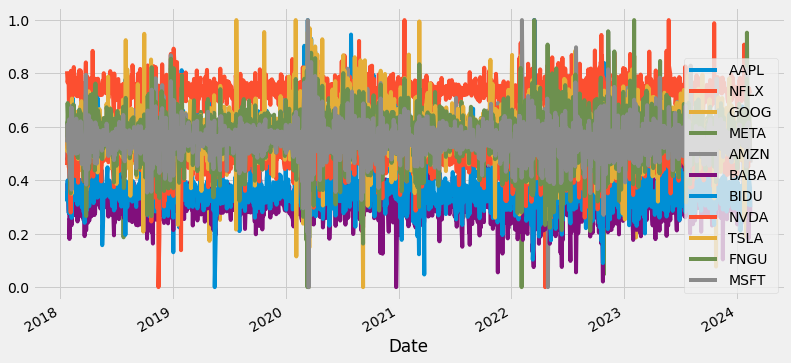

In [14]:
def normIt(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = normIt(stocks)
stocks_norm.plot()

# Selecting the most correlated


In [15]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns, index=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,AAPL,NFLX,GOOG,META,AMZN,BABA,BIDU,NVDA,TSLA,FNGU,MSFT
AAPL,1.000000,0.515883,0.663278,0.574347,0.643148,0.413664,0.421375,0.621965,0.453195,0.737302,0.710113
NFLX,1.515883,1.515883,1.173736,1.122710,1.243596,0.817253,0.824310,1.150283,0.864324,1.428241,1.255582
GOOG,2.179161,2.026341,2.173736,1.813770,1.937539,1.260258,1.276097,1.763441,1.266680,2.179604,2.004960
META,2.753508,2.574704,2.864795,2.813770,2.560888,1.698193,1.693211,2.338445,1.639661,2.917926,2.632097
AMZN,3.396656,3.175152,3.558738,3.437119,3.560888,2.148579,2.120473,2.964245,2.073828,3.693414,3.334421
BABA,3.810319,3.578742,4.001743,3.875054,4.011274,3.148579,2.823187,3.386258,2.410659,4.315498,3.758118
BIDU,4.231694,3.981677,4.453530,4.292169,4.438535,3.851292,3.823187,3.819243,2.769622,4.949295,4.183959
NVDA,4.853659,4.509994,5.066688,4.867173,5.064334,4.273306,4.256172,4.819243,3.243874,5.729324,4.853668
TSLA,5.306854,4.921124,5.469045,5.240153,5.498502,4.610137,4.615134,5.293496,4.243874,6.386659,5.281068
FNGU,6.044156,5.612063,6.220408,5.978475,6.273990,5.232220,5.248931,6.073525,4.901209,7.386659,6.034755


In [16]:
corrwith = stocks_norm.corr()
corr_cumSum = corrwith.cumsum()
corr_cumSum

,AAPL,NFLX,GOOG,META,AMZN,BABA,BIDU,NVDA,TSLA,FNGU,MSFT
AAPL,1.000000,0.468078,0.675365,0.557107,0.623544,0.392713,0.392831,0.641374,0.468536,0.762716,0.750078
NFLX,1.468078,1.468078,1.157507,1.039447,1.191452,0.761553,0.730650,1.127946,0.829085,1.434734,1.256917
GOOG,2.143443,1.950220,2.157507,1.686378,1.866531,1.151393,1.142727,1.758784,1.226353,2.204923,2.021312
META,2.700550,2.432560,2.804438,2.686378,2.474824,1.523655,1.498809,2.296366,1.559076,2.927598,2.623914
AMZN,3.324095,3.000467,3.479518,3.294671,3.474824,1.911646,1.875836,2.910463,1.980596,3.706920,3.322678
BABA,3.716808,3.369306,3.869358,3.666932,3.862815,2.911646,2.574103,3.306842,2.294599,4.314980,3.702300
BIDU,4.109639,3.707125,4.281436,4.023014,4.239842,3.609913,3.574103,3.715755,2.645036,4.937962,4.090407
NVDA,4.751013,4.193696,4.912274,4.560596,4.853939,4.006292,3.983016,4.715755,3.115358,5.721660,4.789055
TSLA,5.219550,4.554246,5.309541,4.893319,5.275459,4.320295,4.333454,5.186077,4.115358,6.395869,5.238457
FNGU,5.982266,5.226263,6.079731,5.615993,6.054781,4.928356,4.956435,5.969775,4.789566,7.395869,6.019846


In [17]:
stocks_norm_spearmanr_cumSum.sort_values("MSFT", inplace=True, axis=1)
top_N = stocks.columns.shape[0] // 3

keepThese = stocks_norm_spearmanr_cumSum.iloc[:, -top_N:]
# keepThese = stocks_norm_spearmanr_cumSum.loc[:, stocks_norm_spearmanr_cumSum.iloc[-1] > 6.5] # > 3

keepThese
keepThese = keepThese.columns
if "FNGU" not in keepThese:
#   keepThese.append("FNGU")
    keepThese.append(pd.Index(["FNGU"]))
keepThese

stocks_norm_high_corr = stocks_norm_spearmanr[keepThese]
stocks_norm_high_corr 

,AMZN,MSFT,FNGU
AAPL,0.643148,0.710113,0.737302
NFLX,1.243596,1.255582,1.428241
GOOG,1.937539,2.004960,2.179604
META,2.560888,2.632097,2.917926
AMZN,3.560888,3.334421,3.693414
BABA,4.011274,3.758118,4.315498
BIDU,4.438535,4.183959,4.949295
NVDA,5.064334,4.853668,5.729324
TSLA,5.498502,5.281068,6.386659
FNGU,6.273990,6.034755,7.386659


Index(['AMZN', 'MSFT', 'FNGU'], dtype='object')

,AMZN,MSFT,FNGU
AAPL,0.643148,0.710113,0.737302
NFLX,0.600448,0.545470,0.690939
GOOG,0.693943,0.749378,0.751363
META,0.623349,0.627136,0.738322
AMZN,1.000000,0.702325,0.775488
BABA,0.450385,0.423697,0.622083
BIDU,0.427262,0.425841,0.633797
NVDA,0.625799,0.669709,0.780029
TSLA,0.434168,0.427400,0.657335
FNGU,0.775488,0.753687,1.000000


<AxesSubplot:xlabel='Date'>

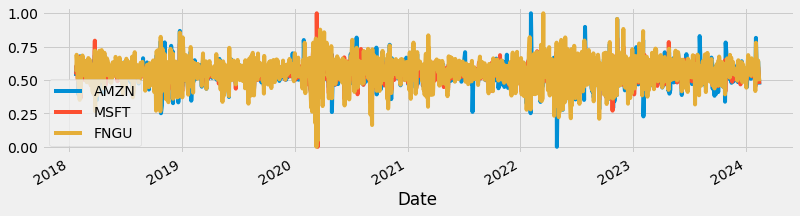

In [18]:
stocks_main = stocks[keepThese]
stocks_main_norm = normIt(stocks_main)
stocks_main_norm.plot(figsize=(12,3))

c:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_fastica.py:519: UserWarning: n_components is too large: it will be set to 3
  warnings.warn(


<AxesSubplot:>

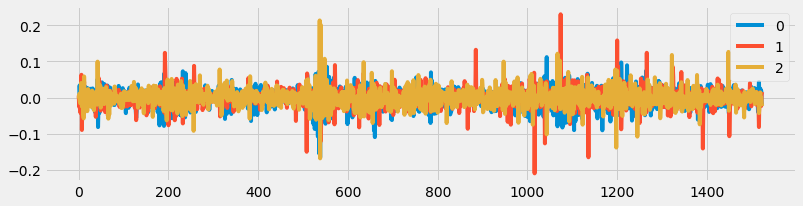

In [19]:
from sklearn.decomposition import FastICA

ica = FastICA(4, max_iter = 900)
stock_ica = ica.fit_transform(stocks_main_norm)
stock_ica = pd.DataFrame(stock_ica)
stock_ica.plot(figsize=(12,3))

<AxesSubplot:>

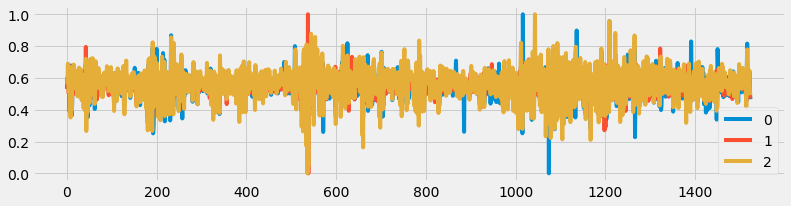

In [20]:
stock_ica = ica.inverse_transform(stock_ica)
stock_ica = pd.DataFrame(stock_ica)
stock_ica.plot(figsize=(12,3))

<AxesSubplot:xlabel='Date'>

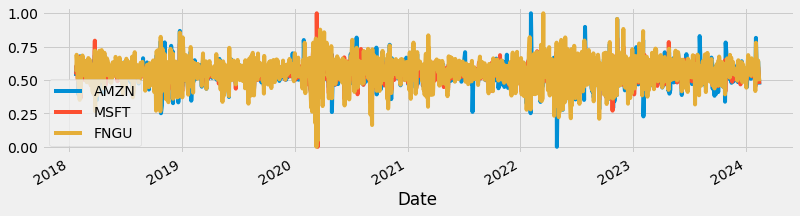

In [21]:
stocks_main_norm.plot(figsize=(12,3))

<AxesSubplot:title={'center':'Illustration of absolute error'}>

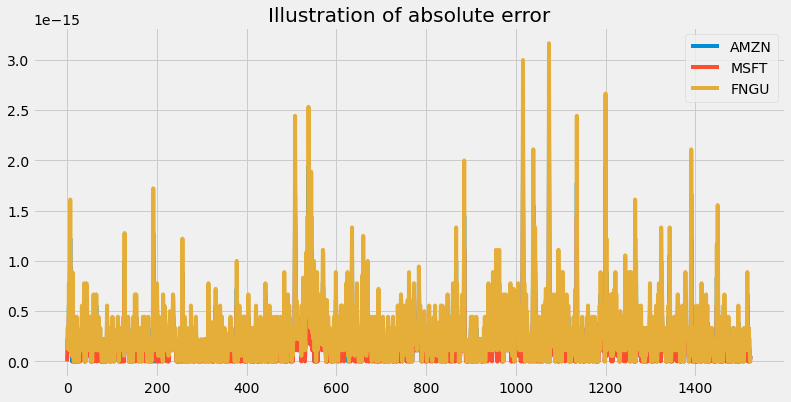

In [22]:
diff = np.abs(stocks_main_norm.values - stock_ica.values)
pd.DataFrame(diff, columns=stocks_main_norm.columns).plot(title="Illustration of absolute error")

# Prediction

not good code. This is the worng notebook for neural network code, the below of written in a single day when I was in my first year of learning


In [23]:
# Run ICA on the non-best-features
all_features = stocks_norm.columns
best_features = stocks_main_norm.columns
not_best_features = list(set(all_features) - set(best_features))

ica = FastICA(4, max_iter = 900)
stock_ica = ica.fit_transform(stocks_norm[not_best_features])
stock_ica = pd.DataFrame(stock_ica)

stock_ica.head(5)

,0,1,2,3
0,-0.011772,-0.014322,0.021055,0.000949
1,-0.017414,-0.006960,0.007542,0.013720
2,0.000550,0.013588,0.027060,-0.010128
3,0.017159,-0.006289,-0.012575,-0.005261
4,-0.001105,-0.011159,-0.021400,-0.002000


In [24]:
stocks_main_norm.reset_index(drop=True, inplace=True)
df = pd.concat([stocks_main_norm, stock_ica], axis=1)

print(f"The Original numbers of stocks was {stocks.shape[1]} top N  most correlated stocks is {stocks_main_norm.shape[1]} to which we added {stock_ica.shape[1]} with ICA. Total Features is {df.shape[1]} ")

df.head(5)

The Original numbers of stocks was 11 top N  most correlated stocks is 3 to which we added 4 with ICA. Total Features is 7 


,AMZN,MSFT,FNGU,0,1,2,3
0,0.530631,0.542380,0.557373,-0.011772,-0.014322,0.021055,0.000949
1,0.597609,0.564304,0.559493,-0.017414,-0.006960,0.007542,0.013720
2,0.606210,0.608850,0.689378,0.000550,0.013588,0.027060,-0.010128
3,0.583747,0.540264,0.588241,0.017159,-0.006289,-0.012575,-0.005261
4,0.594597,0.502116,0.514554,-0.001105,-0.011159,-0.021400,-0.002000


In [25]:
TARGET = 'FNGU'
y_scaled_train = df[TARGET].values
X_scaled_train = df.drop([TARGET], axis=1).values

split = int(X_scaled_train.shape[0] * 0.9)
print(f'len of all data {X_scaled_train.shape[0]}, len of Split {split}')

train = X_scaled_train[:split]
valid = X_scaled_train[split:]

y_train_ = y_scaled_train[:split]
y_valid_ = y_scaled_train[split:]

print(train.shape)
print(y_train_.shape)
print(valid.shape)
print(y_valid_.shape)

len of all data 1524, len of Split 1371
(1371, 6)
(1371,)
(153, 6)
(153,)


In [26]:
seqLen = 20

x_train,y_train,x_test,y_test = [],[],[],[]
for i in range(seqLen,train.shape[0]):
    x_train.append(train[i-seqLen:i,0])
    y_train.append(y_train_[i])

for z in range(seqLen,valid.shape[0]):
    x_test.append(valid[z-seqLen:z,0])
    y_test.append(y_valid_[z])

x_train, y_train,x_test,y_test = np.array(x_train), np.array(y_train),np.array(x_test),np.array(y_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

x_train.shape
x_test.shape

(1351, 20, 1)

(133, 20, 1)

In [27]:
import tensorflow as tf

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
# from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [28]:
tf.keras.backend.clear_session()

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5622474017157555917
xla_global_id: -1
]


In [29]:
def makeModel():
  model = Sequential()

  # model.add(LSTM(100, return_sequences=True, stateful=True, batch_size=1, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(LSTM(32, dropout=0.2, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
  
  model.add(LSTM(32, return_sequences=False))   # recurrent_dropout=0.1 will prevent cuDNN, using TF2
  model.add(Dense(32, activation='elu')) # sigmoid or elu
  model.add(Dense(1))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.002), loss='mean_squared_error') # metrics=['mean_squared_error', 'mae']
  return model

In [30]:
epochs = 120
batch_size = 16
callbacks=[]
model = makeModel()

stop = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min', restore_best_weights=True)
callbacks.append(stop)  
# callbacks.append(ModelCheckpoint('./my_model.hdf5', save_best_only=True, monitor='val_loss', mode='min'))
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min'))

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  callbacks=callbacks, validation_split =.1, shuffle=True) # valadation_splite is not random. shuffle=False TODO  stateful=True

Epoch 1/120
76/76 [==============================] - 5s 19ms/step - loss: 0.0214 - val_loss: 0.0084 - lr: 0.0020
Epoch 2/120
76/76 [==============================] - 1s 10ms/step - loss: 0.0124 - val_loss: 0.0099 - lr: 0.0020
Epoch 3/120
76/76 [==============================] - 1s 10ms/step - loss: 0.0121 - val_loss: 0.0084 - lr: 0.0020
Epoch 4/120
76/76 [==============================] - 1s 10ms/step - loss: 0.0113 - val_loss: 0.0090 - lr: 0.0020
Epoch 5/120
75/76 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.
76/76 [==============================] - 1s 10ms/step - loss: 0.0110 - val_loss: 0.0084 - lr: 0.0020
Epoch 6/120
76/76 [==============================] - 1s 10ms/step - loss: 0.0105 - val_loss: 0.0088 - lr: 0.0010
Epoch 7/120
76/76 [==============================] - 1s 10ms/step - loss: 0.0104 - val_loss: 0.0084 - lr: 0.0010
Epoch 8/120
76/76 [==============================] - 1s 10ms/step - l

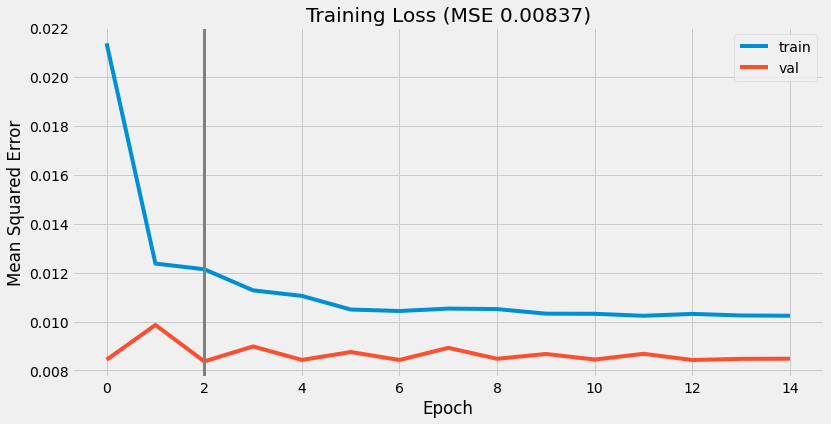

loss 		 0.01023428700864315
val loss 	 0.008370809257030487


In [31]:
# history.history.keys()
_=plt.plot(history.history['loss'])
_=plt.plot(history.history['val_loss'])
_=plt.axvline(stop.best_epoch, linewidth=3, color='gray')
_=plt.title(f'Training Loss (MSE {stop.best:.5f})')
_=plt.ylabel('Mean Squared Error')
_=plt.xlabel('Epoch')
_=plt.legend(['train', 'val'], loc='upper right')
_=plt.show()
print('loss \t\t', min(history.history['loss']))
print('val loss \t', min(history.history['val_loss']))

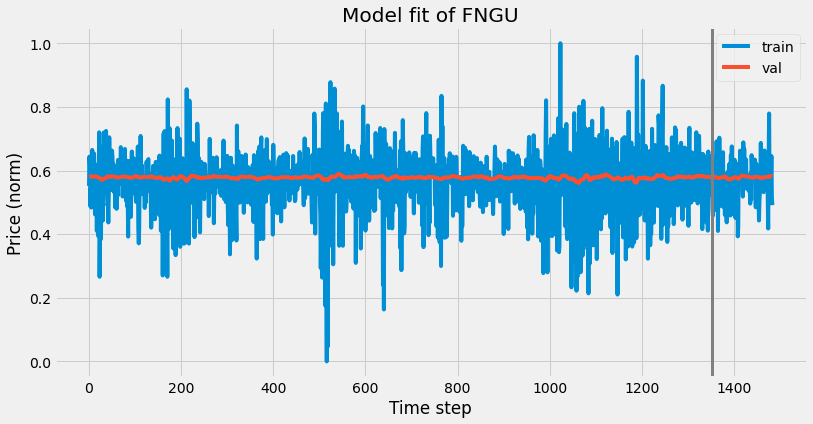

In [32]:
y = np.concatenate([y_train, y_test])

y_a = model.predict(x_train).flatten()
y_b = model.predict(x_test).flatten()
y_hat = np.concatenate([y_a, y_b])

_=plt.figure(figsize=(12,6))
_=plt.plot(y)
_=plt.plot(y_hat)
_=plt.axvline(y_a.shape[0], linewidth=3, color='gray')

_=plt.title(f'Model fit of {TARGET}')
_=plt.ylabel('Price (norm)')
_=plt.xlabel('Time step')
_=plt.legend(['train', 'val'], loc='upper right')

plt.show()

## predicting without neural networks

In [33]:
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import BayesianRidge

# from fbprophet import Prophet
from sklearn.svm import SVR 
import xgboost

In [ ]:
x = np.arange(df.shape[0]).reshape(-1, 1)
x_pred = np.arange(df.shape[0], df.shape[0]+10).reshape(-1, 1)

y = df.values
# y = df["XEG.to"].values 

regs = [DecisionTreeRegressor(),
        AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), loss='square'),
        RandomForestRegressor(200),
        GradientBoostingRegressor(n_estimators=150, max_depth=5),
        BayesianRidge(n_iter=500, tol=0.0015, normalize=True)]
for reg in regs:
  try:
    _ = reg.fit(x, y)
  except:
    print(f'Do only {"XEG.to"}')
    _ = reg.fit(x, stocks_main_norm["XEG.to"].values)

  
  y_pred = reg.predict(x_pred)

  _ = plt.plot(x, y)
  _ = plt.plot(x_pred, y_pred)
  _ = plt.title(str(type(reg)).split(".")[-1][:-2])
  plt.show()

TODO make plots like these https://github.com/akhil2706/Stock-Price-Prediction-using-LSTMs-and-ICA/blob/master/final_project.ipynb

In [ ]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
  

model = ARIMA(stocks_main_norm["FNGU"], order=(5,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# residuals.plot(kind='kde')
# pyplot.show()
print(residuals.describe())

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = stocks_main_norm["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test+10)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA to forecast 

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = stocks_main_norm["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print (history==train) #True 
for t in range(len(test)+10):
    model = ARIMA(history[-1*len(test):], order=(5,1,0)) # changed*
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    try:
      obs = test[t]
    except IndexError:
      obs = yhat
	

    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
 
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import numpy as np

#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change = stocks.apply(lambda x: (x) - (x.shift(1))) # shift moves dates back by 1.
stock_change=stock_change.dropna()
stock_change.head()

In [ ]:
stock_change.plot(grid = True,subplots=True)#.axhline(y = 0, color = "black", lw = 2)

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


In [ ]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc

def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = yf.download("FNGU", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

does the PCA of the lesser CORR fetures assist in forcasting an index? 